## setup

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from os.path import join

In [5]:
path_csv1 = join('..', 'dataset', 'ants', 'csvs', 'ants_seq1.csv')

df1 = pd.read_csv(path_csv1)
df1.set_index('Unnamed: 0', inplace=True)

df1

,frameno,ant_id,x,y,next_x,next_y,speed,angle,cos(angle)
Unnamed: 0,,,,,,,,,
0,1,11,693.603,1.5630,674.258,8.8174,20.660478,-0.358772,0.936329
1,1,12,671.840,639.9510,674.258,644.7870,5.406812,1.107149,0.447214
2,1,13,758.893,777.7850,746.802,777.7850,12.091000,0.000000,1.000000
3,1,14,780.656,695.5680,778.238,690.7320,5.406812,1.107149,0.447214
4,1,15,843.528,303.8300,845.946,296.5760,7.646387,-1.249046,0.316228
...,...,...,...,...,...,...,...,...,...
3505,351,16,1087.760,226.4500,NaN,NaN,NaN,NaN,NaN
3506,351,17,855.618,-22.6184,NaN,NaN,NaN,NaN,NaN
3507,351,18,962.020,199.8500,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.isna().sum()

frameno         0
ant_id          0
x               0
y               0
next_x         10
next_y         10
speed          10
angle         111
cos(angle)    111
dtype: int64

In [13]:
ant_id = 11  
ant_data = df1[df1['ant_id'] == ant_id].sort_values('frameno')

In [14]:
ant_data

,frameno,ant_id,x,y,next_x,next_y,speed,angle,cos(angle)
Unnamed: 0,,,,,,,,,
0,1,11,693.603,1.5630,674.258,8.8174,20.660478,-0.358772,0.936329
10,2,11,674.258,8.8174,669.422,8.8174,4.836000,0.000000,1.000000
20,3,11,669.422,8.8174,652.495,13.6537,17.604350,-0.278300,0.961524
30,4,11,652.495,13.6537,645.241,18.4899,8.718334,-0.588022,0.832040
40,5,11,645.241,18.4899,635.568,20.9081,9.970688,-0.244974,0.970144
...,...,...,...,...,...,...,...,...,...
3460,347,11,563.024,514.2080,558.188,519.0440,6.839137,-0.785398,0.707107
3470,348,11,558.188,519.0440,563.024,519.0440,4.836000,0.000000,1.000000
3480,349,11,563.024,519.0440,565.442,519.0440,2.418000,0.000000,1.000000


## embedding and plot

In [24]:
tau = 1 
d = 3

# Create embedded matrix
def embed(series, tau, d):
    n = len(series)
    if n - (d - 1) * tau < 1:
        raise ValueError("Time series is too short for the chosen tau and dimension")
    embedded = np.array([series[i:n-(d-i)*tau] for i in range(d)]).T
    return embedded

# analyze x-coordinate movements
embedded_x = embed(ant_data['x'], tau, d)

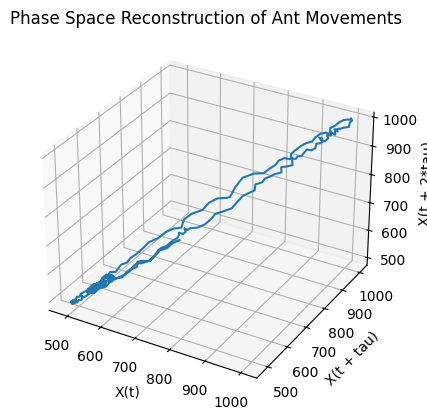

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedded_x[:, 0], embedded_x[:, 1], embedded_x[:, 2])
ax.set_title('Phase Space Reconstruction of Ant Movements')
ax.set_xlabel('X(t)')
ax.set_ylabel('X(t + tau)')
ax.set_zlabel('X(t + 2*tau)')
plt.show()


- work in progress